--- 1. Data Loading and Cleaning ---
Total entries after cleaning: 1550

DataFrame Head:
            timestamp           source  \
0 2025-11-01 20:25:15       batch_user   
1 2025-11-01 20:25:16  batch_assistant   
2 2025-11-01 20:25:16       batch_user   
3 2025-11-01 20:25:17  batch_assistant   
4 2025-11-01 20:25:17       batch_user   

                                             message        date  \
0                  What is the current AQI in Delhi?  2025-11-01   
1  Based on the provided data, the AQI in Delhi o...  2025-11-01   
2    Which city currently has the worst air quality?  2025-11-01   
3  Based on the provided data, the city with the ...  2025-11-01   
4         Which city has the cleanest air right now?  2025-11-01   

   message_length  
0              33  
1             588  
2              47  
3             139  
4              42  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 5 columns):
 #   C

/tmp/ipython-input-2401341989.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


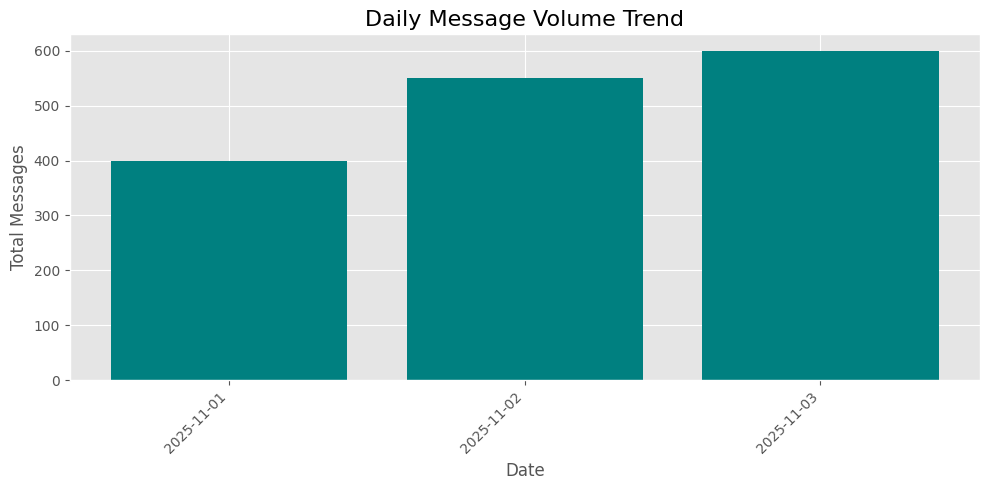


--- 3. Groq-Accelerated Analysis: Response Latency ---
Mean Response Latency: 14.937 seconds
Median Response Latency: 17.000 seconds
Min Response Latency: 1.000 seconds
Max Response Latency: 62.000 seconds


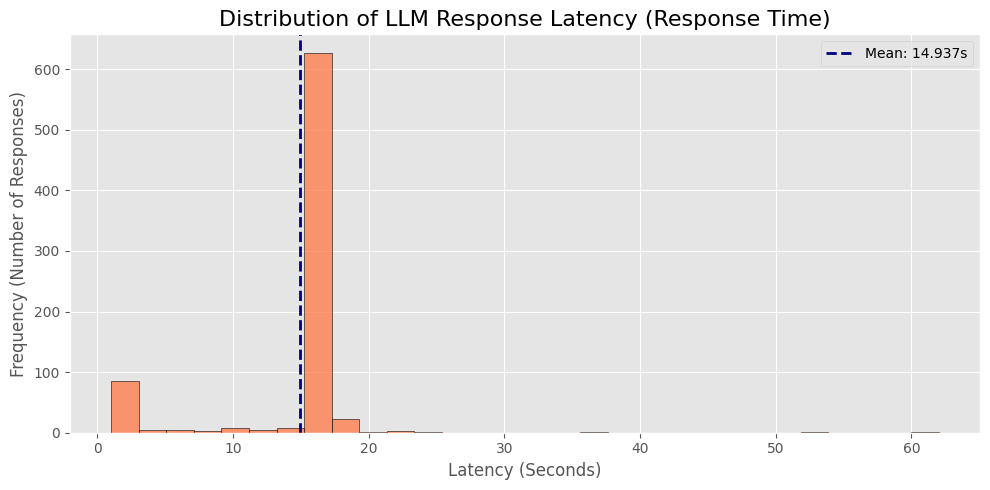


--- 4. Intelligent Air Quality Analysis: User Query Topic Modeling ---

Query Topic Distribution:
                      Topic  Query Count  Percentage
0            Health/Impacts           67        8.65
1  Real-time/Current Status           46        5.94
2        Forecasting/Trends           33        4.26
3         Source/Mitigation           29        3.74
4            Data/Reporting           20        2.58


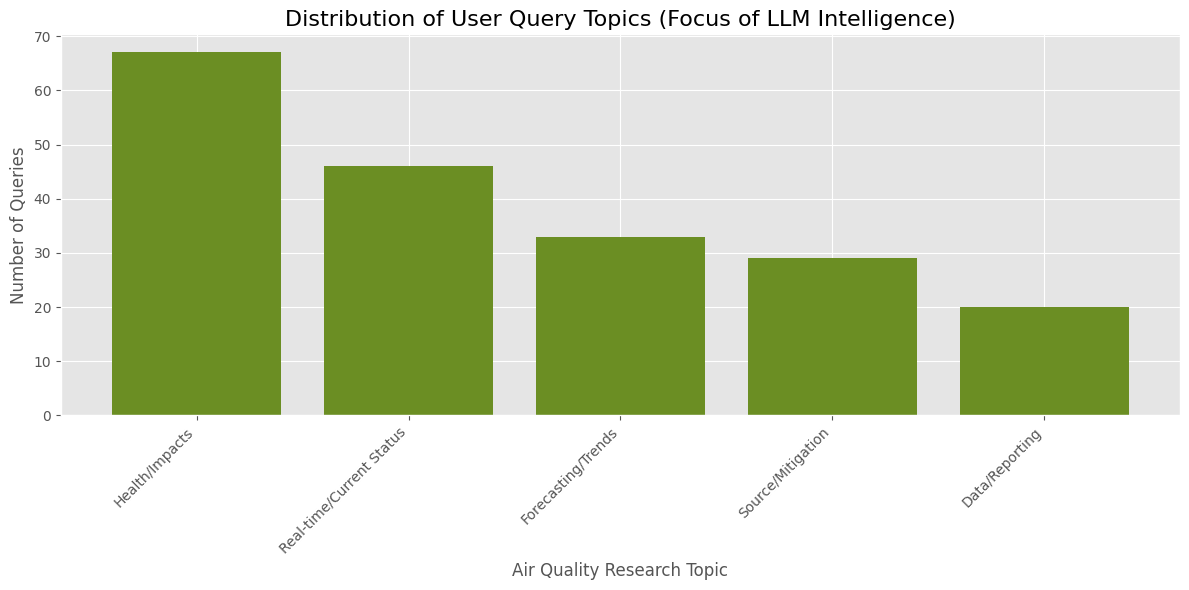

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set Matplotlib style for better visualization
plt.style.use('ggplot')

# --- SECTION 1: Data Loading, Cleaning, and Feature Engineering ---
# Load the chat log file. Assuming 'chat_log.csv' is in the same directory.
print("--- 1. Data Loading and Cleaning ---")
df = pd.read_csv('/content/chat_log.csv', header=None, names=['timestamp', 'source', 'message'])

# Convert 'timestamp' to datetime and drop any rows where conversion failed (NaT)
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df.dropna(subset=['timestamp'], inplace=True)

# Feature Engineering
df['date'] = df['timestamp'].dt.date
df['message_length'] = df['message'].apply(lambda x: len(str(x)))

print(f"Total entries after cleaning: {len(df)}")
print("\nDataFrame Head:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())

# --- SECTION 2: General Log Insights (Usage Pattern) ---
print("\n--- 2. General Log Insights ---")

# Message Volume by Source
message_counts = df['source'].value_counts().reset_index().rename(columns={'index': 'Source', 'source': 'Count'})
print("\n2.1. Message Counts by Source:")
print(message_counts)

# Daily Message Volume
daily_messages = df.groupby('date').size().reset_index(name='message_count')
print("\n2.2. Daily Message Volume:")
print(daily_messages)

# Plotting Daily Message Volume
daily_messages['date_str'] = daily_messages['date'].astype(str)
plt.figure(figsize=(10, 5))
plt.bar(daily_messages['date_str'], daily_messages['message_count'], color='teal')
plt.title('Daily Message Volume Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Messages', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# --- SECTION 3: Groq-Accelerated Analysis (Latency) ---
# Goal: Measure the time difference between user query and assistant response.
print("\n--- 3. Groq-Accelerated Analysis: Response Latency ---")

user_df = df[df['source'] == 'batch_user'].reset_index(drop=True)
assistant_df = df[df['source'] == 'batch_assistant'].reset_index(drop=True)

# Calculate latency in seconds (assuming 1:1 pairing and alignment by index)
# This simulates the "Time To First Token" or overall response time.
latency_seconds = (assistant_df['timestamp'] - user_df['timestamp']).dt.total_seconds()

# Latency Statistics
mean_latency = latency_seconds.mean()
median_latency = latency_seconds.median()
min_latency = latency_seconds.min()
max_latency = latency_seconds.max()

print(f"Mean Response Latency: {mean_latency:.3f} seconds")
print(f"Median Response Latency: {median_latency:.3f} seconds")
print(f"Min Response Latency: {min_latency:.3f} seconds")
print(f"Max Response Latency: {max_latency:.3f} seconds")

# Plotting Latency Distribution
plt.figure(figsize=(10, 5))
plt.hist(latency_seconds, bins=30, color='coral', edgecolor='black', alpha=0.8)
plt.axvline(mean_latency, color='navy', linestyle='dashed', linewidth=2, label=f'Mean: {mean_latency:.3f}s')
plt.title('Distribution of LLM Response Latency (Response Time)', fontsize=16)
plt.xlabel('Latency (Seconds)', fontsize=12)
plt.ylabel('Frequency (Number of Responses)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


# --- SECTION 4: Intelligent Air Quality Analysis (Topic Modeling) ---
# Goal: Categorize user queries to understand the required "intelligence" features.
print("\n--- 4. Intelligent Air Quality Analysis: User Query Topic Modeling ---")

user_queries = df[df['source'] == 'batch_user']['message'].str.lower()
total_queries = len(user_queries)

# Define keywords for key air quality research areas
keywords = {
    'Health/Impacts': ['health', 'impact', 'risk', 'effect', 'respiratory', 'vulnerable', 'pregnant', 'children'],
    'Real-time/Current Status': ['current aqi', 'worst air quality', 'cleanest air', 'aqi in', 'now'],
    'Forecasting/Trends': ['forecast', 'predict', 'trend', 'future', 'outlook', 'tomorrow', 'weekly'],
    'Source/Mitigation': ['source', 'cause', 'mitigation', 'reduce', 'solution', 'renewable energy', 'urbanization', 'policy'],
    'Data/Reporting': ['data source', 'report', 'historical data', 'methodology', 'accuracy']
}

# Calculate the count of queries for each topic (ensuring no double-counting for terms in the same topic)
topic_accurate_counts = {}
for topic, terms in keywords.items():
    # Create a mask: True if ANY term for the topic is present in the query
    mask = user_queries.apply(lambda x: any(term in x for term in terms))
    topic_accurate_counts[topic] = mask.sum()

# Convert to DataFrame
topic_df = pd.DataFrame(list(topic_accurate_counts.items()), columns=['Topic', 'Query Count'])
topic_df['Percentage'] = (topic_df['Query Count'] / total_queries * 100).round(2)
topic_df = topic_df.sort_values(by='Query Count', ascending=False)

print("\nQuery Topic Distribution:")
print(topic_df)

# Plotting Query Topic Distribution
plt.figure(figsize=(12, 6))
plt.bar(topic_df['Topic'], topic_df['Query Count'], color='olivedrab')
plt.title('Distribution of User Query Topics (Focus of LLM Intelligence)', fontsize=16)
plt.xlabel('Air Quality Research Topic', fontsize=12)
plt.ylabel('Number of Queries', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import os

# --- Configuration ---
LOG_FILE = "/content/chat_log.csv"
OUTPUT_FILE = "all_775_queries.txt"

def extract_and_save_queries(log_file, output_file):
    """
    Loads the chat log, filters for user queries, and saves them line-by-line
    to a text file for use in the Streamlit Batch Analysis tool.
    """
    try:
        # 1. Load the data. Assuming the CSV has no explicit header and columns are ordered.
        df_log = pd.read_csv(log_file, header=None, names=['timestamp', 'source', 'message'])

        # 2. Filter for only the user messages. This includes 'user' and 'batch_user'.
        # Using case=False ensures robustness against minor casing differences.
        df_user_queries = df_log[df_log['source'].str.contains('user', case=False, na=False)].copy()

        # Extract the messages and convert to a list
        user_queries_list = df_user_queries['message'].tolist()

        # 3. Write the queries to a text file, one per line
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write('\n'.join(user_queries_list))

        print(f"--- Extraction Successful ---")
        print(f"Total user queries extracted: {len(user_queries_list)}")
        print(f"Queries saved to file: {output_file}")
        print("\nVerification (First 5 Queries):")
        print('-----------------------------')
        print('\n'.join(user_queries_list[:5]))
        print('-----------------------------')
        print(f"This content is now ready to be pasted into your Streamlit app's 'Batch Analysis Tool'.")

    except FileNotFoundError:
        print(f"ERROR: The file '{log_file}' was not found. Please ensure it is in the current directory.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    extract_and_save_queries(LOG_FILE, OUTPUT_FILE)


--- Extraction Successful ---
Total user queries extracted: 775
Queries saved to file: all_775_queries.txt

Verification (First 5 Queries):
-----------------------------
What is the current AQI in Delhi?
Which city currently has the worst air quality?
Which city has the cleanest air right now?
What is the AQI category for Mumbai today?
Compare AQI values between Delhi and Bangalore.
-----------------------------
This content is now ready to be pasted into your Streamlit app's 'Batch Analysis Tool'.
